# Introduction
- **Deep learning** - One of the machine learning technique that learns features directly from data
- **Why Deepylearn** - When the amount of data is increased, machine learning techniques are insufficient in terms of performance and deep learning gives better performance like accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


## Overview the Data Set
- There are 2062 sign language digit images
- There are 10 unique sign - 0 to 9
- In the dataset, sign zero is between indexes 204 and 408
- Sign one is between 822 and 1027

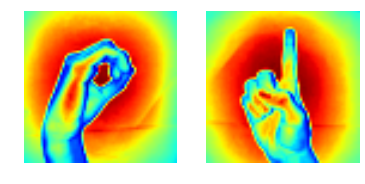

In [2]:
# load data set
data_x = np.load('./datasets/sign-language-digits/X.npy')
data_y = np.load('./datasets/sign-language-digits/Y.npy')

img_size = 64

plt.subplot(1, 2, 1)
plt.imshow(data_x[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(data_x[900].reshape(img_size, img_size))
plt.axis('off')
plt.show()

In [3]:
# Join a sequence of arrays along a row axis
X = np.concatenate((data_x[204:409], data_x[822:1027]), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0], 1)
print("X shape : ", X.shape)
print("Y shape : ", Y.shape)

('X shape : ', (410, 64, 64))
('Y shape : ', (410, 1))


- The shape of X is (410, 64, 64)
    - 410 means that we have 410 images (zero and one signs)
    - 64 means that our image size is 64x64 pixels
- The shape of Y is (410, 1)
    - 410 means that we have 410 labels (zero and one)
    
## Creating Train and Test Set
- Lets split X and Y into train and test sets
    - test = 15% and train = 75%

In [4]:
# Create X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
train_no = X_train.shape[0]
test_no = X_test.shape[0]

print('No. of test  data: ', test_no)
print('No. of train data: ', train_no)

('No. of test  data: ', 62)
('No. of train data: ', 348)


- The input array (X) is in 3D, we need to make it flatten (2D) in order to use as input for our deepylearn
- The label (Y) is already flatten

In [5]:
Xtr_shape = X_train.shape
Xte_shape = X_test.shape
X_train_flat = X_train.reshape(train_no, Xtr_shape[1]*Xtr_shape[2])
X_test_flat  = X_test.reshape(test_no, Xte_shape[1]*Xte_shape[2])

print('X train flatten: ', X_train_flat.shape)
print('X test  flatten: ', X_test_flat.shape)

('X train flatten: ', (348, 4096))
('X test  flatten: ', (62, 4096))


In [7]:
# Taking transpose
x_train = X_train_flat.T
x_test  = X_test_flat.T
y_train = Y_train.T
y_test  = Y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test ", y_test.shape)

('x train: ', (4096, 348))
('x test: ', (4096, 62))
('y train: ', (1, 348))
('y test ', (1, 62))


## Logistic Regression
- Logistic Regression is a very simple neural network

### Computation Graph
- Computation graph are a nice way to think about mathematical expressions
- It is like visualization of mathematical expressions
- C